### ARMA: MA(1), ACF + PSD 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy import signal

%matplotlib inline

**Introduction:** 

In this exercise, we will focus on special case of ARMA(p,q) process, namely ARMA(0,1)=MA(1) process. We then compare the ACF and PSD of the generated time series.

**Exercise:** 

We generate a MA(1) time series. As you know from the lectures an MA(1) is of the form

$$
Y_t = \theta \epsilon_{t-1}+ \epsilon_{t}
$$

We assume $\theta=0.8$, and the time series is assumed to be stationary, so $\mathbb{E}(Y_t)=0$ and $\mathbb{D}(Y_t)=\sigma^2$, with $\sigma=1$. For generating the time series, we need an initialization of one sample generated randomly as $(0,\sigma^2)$, and then use the above recursive formulae. The variance of $\epsilon_t$ is obtained from

$$
\sigma_{\epsilon}^2 = \frac{\sigma^2}{1+\theta^2}
$$

We can then apply the ACF and PSD to the generated MA(1) noise process.

We start defining the parameters of the white noise $\epsilon \sim \textbf{N} (\mu=0, \sigma_{\epsilon}^2=1)$. As previously done in the [Time series components exercise](https://mude.citg.tudelft.nl/book/time_series/exercise1.html#), the number of observation is $m=501$ and the time interval is $\Delta t = 1$ s. The sampling rate is chosen equal to $f_s=1$ Hz.

We also define $\sigma_{\epsilon}$ and create the arrays for $Y$ and $\epsilon$.

In [4]:
# simulate an ARMA(0,1)=MA(1) noise process (moving average of order 1)
mean2 = 0 
sigma2 = 1
theta = 0.8
m = 501
time = np.arange(m) 
Fs = 1 

sigma_e = np.sqrt(sigma2**2/(1+theta**2))
y = np.zeros(m) 
e = np.zeros(m) 

We now initialize the first entry of <code>e</code> and <code>y</code> such that $Y(0)=\epsilon(0)$ and then we can loop using the function $Y_t = \theta \epsilon_{t-1}+ \epsilon_{t}$ defined above. Note that all entries of $\epsilon$ are random numbers, but $\epsilon (0)$ depends on $\sigma^2$, while the others on $\sigma_{\epsilon}$.

Then we plot the time series.

Text(0.5, 0, 'time')

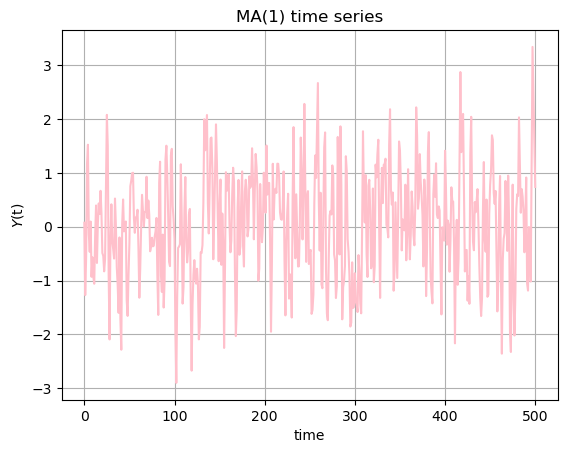

In [6]:
e[0] = np.random.randn() * sigma2
y[0] = e[0]

for i in range(1, m):
    e[i] = np.random.randn() * sigma_e
    y[i] = theta * e[i-1] + e[i]

plt.figure()
plt.grid()
plt.plot(time, y, color='pink')
plt.title('MA(1) time series')
plt.ylabel('$Y$(t)')
plt.xlabel('time')

We can now compute and plot the ACF of the MA(1) process.

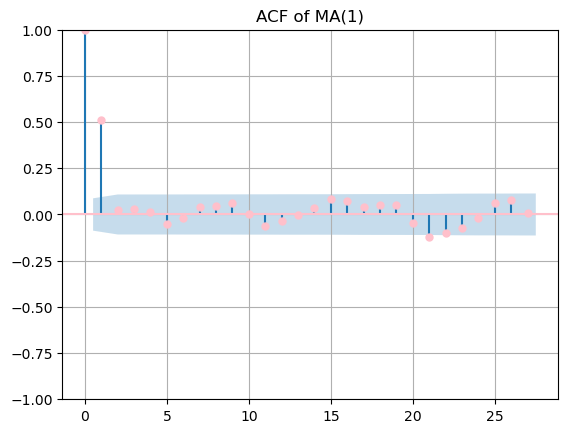

In [7]:
ACF = plot_acf(y, lags=None, alpha=0.05, title='ACF of MA(1)', color='pink')
plt.grid()

Eventually we plot the PSD of the MA(1) process.

Text(0.5, 0, 'Frequency')

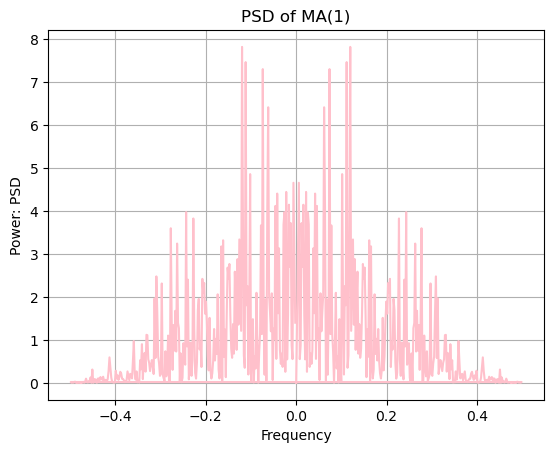

In [8]:
F, PSD = signal.periodogram(y, fs=Fs, scaling='density', return_onesided=False)
plt.figure()
plt.grid()
plt.plot(F, PSD, color='pink')
plt.title('PSD of MA(1)')
plt.ylabel('Power: PSD')
plt.xlabel('Frequency')

The PSD values seem to have larger values at lower frequencies. This indicates that lower frequencies have higher contribution to data variability (as the moving average reduces the high frequency noise). 